In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("C:\\Data\\MeiData\\Udacity\\Data Scientist\\Blog Post\\Seattle\\clean_df.csv", index_col=0)
df.head()

,name,transit,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_date
0,Stylish Queen Anne Apartment,NaN,2011-08-11,within a few hours,96.0,100.0,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",...,10.0,9.0,10.0,f,moderate,f,f,2,4.07,2011-08-11
1,Bright & Airy Queen Anne Apartment,"Convenient bus stops are just down the block, ...",2013-02-21,within an hour,98.0,100.0,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",...,10.0,10.0,10.0,f,strict,t,t,6,1.48,2013-02-21
2,New Modern House-Amazing water view,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,within a few hours,67.0,100.0,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",...,10.0,10.0,10.0,f,strict,f,f,2,1.15,2014-06-12
3,Queen Anne Chateau,NaN,2013-11-06,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,NaN,NaN,NaN,f,flexible,f,f,1,NaN,2013-11-06
4,Charming craftsman 3 bdm house,The nearest public transit bus (D Line) is 2 b...,2011-11-29,within an hour,100.0,NaN,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",...,10.0,9.0,9.0,f,strict,f,f,1,0.89,2011-11-29


## Single Linear Regression

In [8]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# 'bedrooms' as the only predictor variable, to see how 'bedrooms' help predict Airbnb price
X = df[['bedrooms']]
Y = df['price']

In [10]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# output prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([108.3344739 , 108.3344739 , 364.71730688,  44.23876566,
       236.52589039])

In [24]:
lm1 = LinearRegression()
lm1 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# 'accommodates' as the only independent variable to predict Airbnb price
lm1.fit(df[['accommodates']], df['price'])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model evaluation using visualization

Residual plot

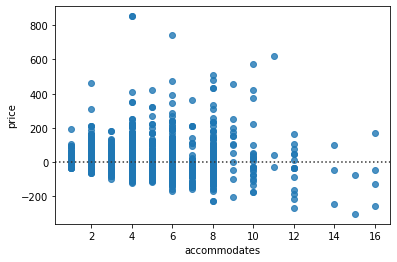

In [27]:
sns.residplot(df['accommodates'], df['price'])

The residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

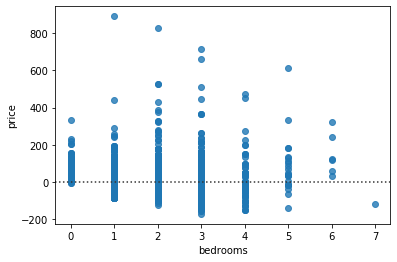

In [28]:
sns.residplot(df['bedrooms'], df['price'])

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

In [ ]:
# check which one is more correlated to price
df[['bedrooms', 'accommodates', 'price']].corr()

## Multiple Linear Regression

In [93]:
Z = df[['accommodates','bedrooms','beds']]

In [29]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
Y_hat = lm.predict(Z)

One way to look at the fit of the (MLR) model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

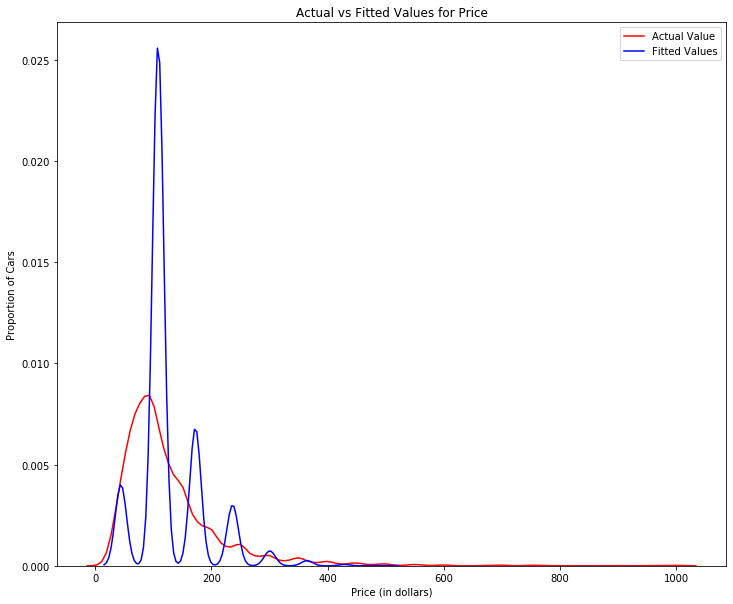

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression

I will try to fit a polynomial model to the data instead, as I saw eariler that a linear model did not provide the best fit while using 'accommodates' as the predictor variable

In [120]:
x = df[['accommodates','bedrooms', 'beds']]
y = df['price']

fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
pr=PolynomialFeatures(degree=5)
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [123]:
Z_pr=pr.fit_transform(x)

In [124]:
model = LinearRegression()

In [125]:
model.fit(Z_pr, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
y_poly_pred = model.predict(Z_pr)

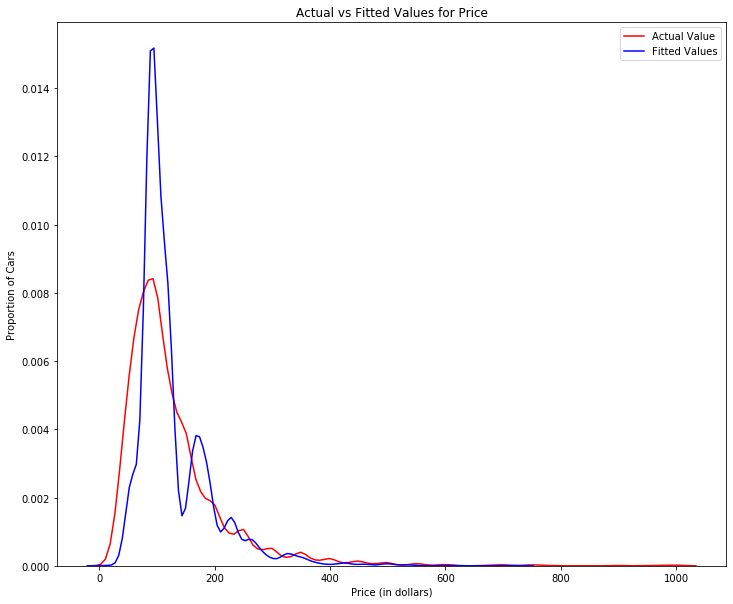

In [127]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_poly_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [131]:
model.coef_

array([ 8.12813804e-10,  1.52724619e+02, -1.60440762e+02,  1.45828365e+01,
       -1.31431442e+01, -4.09668856e+01, -9.57985442e+01,  1.38844774e+02,
        1.52249210e+02,  1.05410157e+01, -4.55195360e+00,  2.86412522e+01,
        7.87571761e+00, -7.25204268e+01,  3.83763094e+01,  2.52364843e+01,
       -1.11218279e+01,  3.09731027e+01, -1.29169491e+02,  8.80795352e+00,
        8.73687153e-01, -7.33469662e+00,  6.51449910e-01,  3.01293286e+01,
       -1.17064880e+01,  1.84022354e+00, -1.72491299e+01, -3.21248058e+01,
        2.06778140e+01, -1.20695997e+01,  2.31226481e+00,  2.76364832e+01,
       -4.50085722e+00,  1.75453232e+01,  1.22446276e+00,  1.10385411e-03,
        2.96836302e-01, -5.17162619e-01, -1.92644748e+00,  2.51657932e+00,
        1.23811932e+00,  6.67729644e-01,  1.89271909e-03, -5.44767256e+00,
       -1.71581954e+00,  2.11488892e+00, -1.96929959e+00,  6.13118092e+00,
        2.88820320e+00,  2.06937636e+00, -1.98031804e+00,  1.10083425e+00,
       -2.23646784e+00, -

This distribution plot looks much better than the multi-linear regression model

# Model evaluation

<p>R^2 / R-squared</p>
<p>Mean Squared Error (MSE)</p>

### Single Linear Regression

In [110]:
# accommodates_fit
lm1.fit(df[['accommodates']], Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.3939764952661896


In [112]:
Yhat=lm1.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [108.3344739  108.3344739  364.71730688  44.23876566]


In [52]:
from sklearn.metrics import mean_squared_error

In [91]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  4934.808896592397


### Multi Linear Regression

In [92]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.463819756448143


In [93]:
Y_predict_multifit = lm.predict(Z)

In [94]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  4366.079888632352


### Polynomial fit

In [46]:
from sklearn.metrics import r2_score

In [128]:
r_squared = r2_score(y, y_poly_pred)
r_squared
print('The R-square value is: ', r_squared)

The R-square value is:  0.5176346720202063


In [129]:
mean_squared_error(df['price'], y_poly_pred)

3927.8686277489405

Polynomial regression has the highest R^2 and smallest MSE

# Conclusion

Polynoimal regression model is the best model to be able to prediction price from the dateset.